# Proyek Analisis Data: E-Commerce Public
- **Nama:** Muhammad Zawawi Basri
- **Email:** zawawibasri@gmail.com
- **ID Dicoding:** MC262D5Y2274

## Menentukan Pertanyaan Bisnis

- Wilayah mana yang paling banyak melakukan transaksi
- Wilayah mana yang paling sedikit melakukan transaksi

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv("data/customers_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
product_category = pd.read_csv("data/product_category_name_translation.csv")
products = pd.read_csv("data/products_dataset.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")


**Insight:**
- Data set memiliki 9 file .csv

### Assessing Data

Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada customers

In [3]:
print ("customers")
customers.info()
print("Jumlah duplikasi: ", customers.duplicated().sum())
customers.describe()


customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada geolocation

In [4]:
print ("geolocation")
geolocation.info()
print("Jumlah duplikasi: ", geolocation.duplicated().sum())
geolocation.describe()

geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada order_items

In [5]:
print ("order_items")
order_items.info()
print("Jumlah duplikasi: ", order_items.duplicated().sum())
order_items.describe()

order_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada order_payments

In [6]:
print ("order_payments")
order_payments.info()
print("Jumlah duplikasi: ", order_payments.duplicated().sum())
order_payments.describe()

order_payments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada order_reviews

In [7]:
print ("order_reviews")
order_reviews.info()
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())
order_reviews.describe()

order_reviews
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada orders

In [8]:
print ("orders")
orders.info()
print("Jumlah duplikasi: ", orders.duplicated().sum())
orders.describe()

orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada product_category

In [9]:
print ("product_category")
product_category.info()
print("Jumlah duplikasi: ", product_category.duplicated().sum())
product_category.describe()

product_category
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada products

In [10]:
print ("products")
products.info()
print("Jumlah duplikasi: ", products.duplicated().sum())
products.describe()

products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada sellers

In [11]:
print ("sellers")
sellers.info()
print("Jumlah duplikasi: ", sellers.duplicated().sum())
sellers.describe()

sellers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Ada banyak missing value pada "order_review", mungkin karena tidak semua pelanggan memberikan review komentar
- Ada beberapa missing value juga di "orders", mungkin karena ada pesanan yang dibatalkan (mungkin?)

### Cleaning Data

Menghapus duplikasi pada geolocation

In [12]:
df = pd.read_csv("data/geolocation_dataset.csv")
df_cleaned = df.drop_duplicates()

Mengganti tipe data shipping_limit_date menjadi datetime pada order_items

In [13]:
df_order_items = pd.read_csv("data/order_items_dataset.csv")

df_order_items["shipping_limit_date"] = pd.to_datetime(df_order_items["shipping_limit_date"])

print(df_order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


Mengganti tipe data review_creation_date menjadi datetime pada order_reviews

In [14]:
df_reviews = pd.read_csv("data/order_reviews_dataset.csv")

df_reviews["review_creation_date"] = pd.to_datetime(df_reviews["review_creation_date"])

print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB
None


Mengganti tipe data order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date menjadi datetime pada orders

In [15]:
df_orders = pd.read_csv("data/orders_dataset.csv")

datetime_columns = [
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "order_estimated_delivery_date"
]

df_orders[datetime_columns] = df_orders[datetime_columns].apply(pd.to_datetime)

print(df_orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB
None


**Insight:**
- Masih ada data yang perlu diubah tipe datanya seperti penanggalan waktu
- Semua kolom memiliki nilai yang lengkap (jos!)

## Exploratory Data Analysis (EDA)

### Explore univariate orders_dataset

In [8]:
df = pd.read_csv("data/orders_dataset.csv")

print(df.describe())

print(df.describe(include=['O']))

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns[:6]):
    plt.subplot(2, 3, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Frekuensi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-08-02 12:05:26  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08

<Figure size 1500x1000 with 0 Axes>

: 

**Insight:**
- Pembelian terendah ada pada jam 5 pagi
- Pembelian tertinggi ada pada jam 4 sore

## Visualization & Explanatory Analysis

### Wilayah mana yang paling banyak melakukan transaksi pada e-commerce

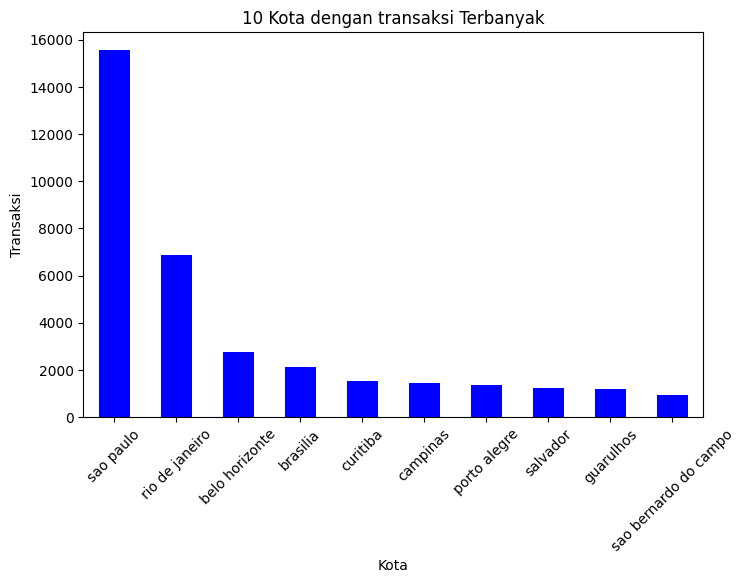

In [7]:
customers = pd.read_csv("data/customers_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")

order_city = orders.merge(customers, on="customer_id", how="left")

city_counts = order_city["customer_city"].value_counts().head(10)

plt.figure(figsize=(8, 5))
city_counts.plot(kind="bar", color="blue")
plt.xlabel("Kota")
plt.ylabel("Transaksi")
plt.title("10 Kota dengan transaksi Terbanyak")
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Kota dengan pengguna terbanyak adalah sao paolo

### Wilayah mana yang paling sedikit menggunakan e-commerce:

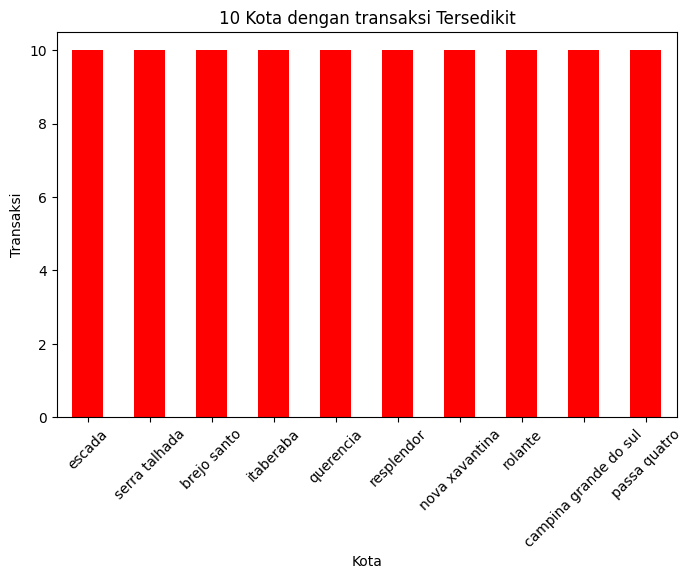

In [3]:
customers = pd.read_csv("data/customers_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")

merged_df = orders.merge(customers, on="customer_id", how="left")

city_counts = merged_df["customer_city"].value_counts()

low_usage_cities = city_counts[city_counts >= 10].tail(10)

plt.figure(figsize=(8, 5))
low_usage_cities.plot(kind="bar", color="red")
plt.xlabel("Kota")
plt.ylabel("Transaksi")
plt.title("10 Kota dengan transaksi Tersedikit")
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Menarik! terlihat ada 10 kota dengan pengguna ecommerce terendah dan masing masing memiliki 1 pengguna (10=1, 8=0.8, 6=0.6, dst.)

## Analisis Lanjutan (Opsional)

### Geospatial penggunaan e-commerce (dibatasi 10000 data, device gakuat hehe)

In [4]:
orders = pd.read_csv("data/orders_dataset.csv")
customers = pd.read_csv("data/customers_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")

order_customer = orders.merge(customers, on="customer_id", how="inner")

geo_data = order_customer.merge(geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")

geo_data_sample = geo_data.sample(n=10000, random_state=42)

order_counts = geo_data_sample.groupby(["geolocation_lat", "geolocation_lng"]).size().reset_index(name="order_count")

m = folium.Map(location=[-23.5505, -46.6333], zoom_start=5)

heat_data = [[row["geolocation_lat"], row["geolocation_lng"], row["order_count"]] for _, row in order_counts.iterrows()]
HeatMap(heat_data, radius=10).add_to(m)
m


## Conclusion

**Pertanyaan 1:**
- Kota dengan pengguna e-commerce terbanyak adalah sao paolo

**Pertanyaan 2:**
- Ada 10 kota yang memiliki pengguna terendah (bisa lebih banyak) yang ditampilkan dengan total pengguna yang sama yaitu 10